In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crop = pd.read_csv('C:/Users/Hp/Documents/crop/CropData.csv')

In [3]:
fert = pd.read_csv('C:/Users/Hp/Documents/crop/FertilizerData.csv')

In [4]:
crop.head()

,Unnamed: 0,temperature,humidity,ph,rainfall,label
0,0,20.879744,82.002744,6.502985,202.935536,rice
1,1,21.770462,80.319644,7.038096,226.655537,rice
2,2,23.004459,82.320763,7.840207,263.964248,rice
3,3,26.491096,80.158363,6.980401,242.864034,rice
4,4,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
crop.drop('Unnamed: 0',axis = 1,inplace = True)

In [6]:
fert.drop('Unnamed: 0',axis = 1,inplace = True)

In [7]:
crop.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
fert.describe()

,N,P,K,pH
count,22.000000,22.000000,22.000000,22.000000
mean,50.454545,45.681818,48.181818,5.409091
std,36.315715,32.634172,51.698426,0.590326
min,20.000000,10.000000,10.000000,4.000000
25%,20.000000,20.000000,20.000000,5.500000
50%,30.000000,40.000000,30.000000,5.500000
75%,80.000000,60.000000,50.000000,5.500000
max,120.000000,125.000000,200.000000,6.500000


In [9]:
fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

Text(0, 0.5, 'Nitrogen (mg/g)')

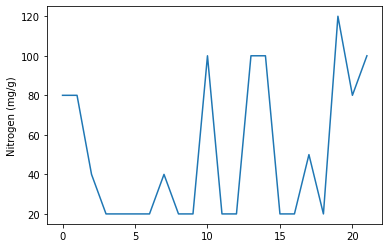

In [10]:
plt.plot(fert["N"])
plt.ylabel('Nitrogen (mg/g)')

Text(0, 0.5, 'Phosphorus (mg/g)')

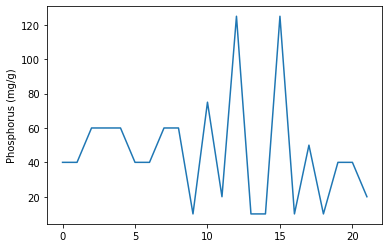

In [11]:
plt.plot(fert["P"])
plt.ylabel('Phosphorus (mg/g)')

Text(0, 0.5, 'Potassium (mg/g)')

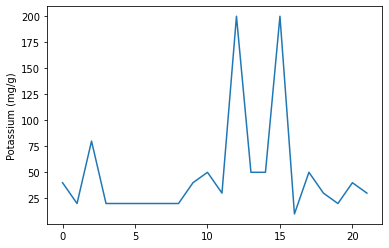

In [12]:
plt.plot(fert["K"])
plt.ylabel('Potassium (mg/g)')

<AxesSubplot:>

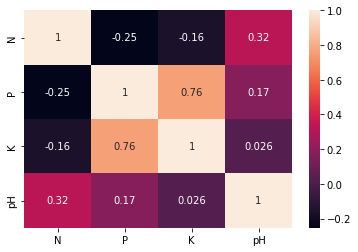

In [13]:
sns.heatmap(fert.corr(),annot=True)


In [14]:
r_fert = fert
crop


,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee
2196,27.417112,56.636362,6.086922,127.924610,coffee
2197,24.131797,67.225123,6.362608,173.322839,coffee
2198,26.272418,52.127394,6.758793,127.175293,coffee


In [15]:
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,len(crop)):
    t_crop = crop.label.iloc[i]
    
    N = r_fert[r_fert['Crop'] == t_crop]["N"].iloc[0] + random.randint(-20,20)
    P = r_fert[r_fert['Crop'] == t_crop]["P"].iloc[0] + random.randint(-5,20)
    K = r_fert[r_fert['Crop'] == t_crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    
    temp = temp.append(d,ignore_index = True)

In [16]:
temp

,N,P,K
0,62,55,45
1,82,58,36
2,79,37,43
3,96,35,44
4,68,44,45
...,...,...,...
2195,98,25,26
2196,100,20,27
2197,104,40,27
2198,120,15,35


In [17]:
crop['N'] = temp['N']
crop['P'] = temp['P']
crop['K'] = temp['K']

In [18]:
crop


,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,62,55,45
1,21.770462,80.319644,7.038096,226.655537,rice,82,58,36
2,23.004459,82.320763,7.840207,263.964248,rice,79,37,43
3,26.491096,80.158363,6.980401,242.864034,rice,96,35,44
4,20.130175,81.604873,7.628473,262.717340,rice,68,44,45
...,...,...,...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee,98,25,26
2196,27.417112,56.636362,6.086922,127.924610,coffee,100,20,27
2197,24.131797,67.225123,6.362608,173.322839,coffee,104,40,27
2198,26.272418,52.127394,6.758793,127.175293,coffee,120,15,35


In [19]:
crop = crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pickle

In [49]:
crop.to_csv('C:/Users/Hp/Documents/crop/crop_recommendation.csv',index=False)

In [21]:
df=pd.read_csv('C:/Users/Hp/Documents/crop/crop_recommendation.csv')

In [22]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,84,36,45,20.879744,82.002744,6.502985,202.935536,rice
1,62,47,37,21.770462,80.319644,7.038096,226.655537,rice
2,96,59,43,23.004459,82.320763,7.840207,263.964248,rice
3,95,58,37,26.491096,80.158363,6.980401,242.864034,rice
4,80,40,38,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,100,33,27,26.774637,66.413269,6.780064,177.774507,coffee
2196,96,19,28,27.417112,56.636362,6.086922,127.924610,coffee
2197,90,26,33,24.131797,67.225123,6.362608,173.322839,coffee
2198,111,19,25,26.272418,52.127394,6.758793,127.175293,coffee


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pickle

In [24]:
df.size

17600

In [25]:
df.shape

(2200, 8)

In [26]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [27]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [28]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [29]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:>

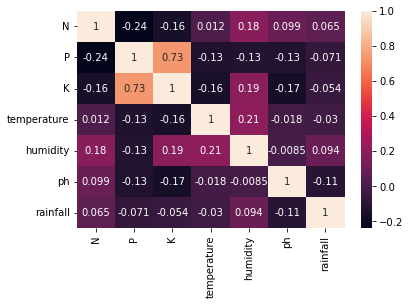

In [30]:
sns.heatmap(df.corr(),annot=True)

In [31]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

In [32]:
acc = []
model = []

In [33]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# DECISION TREE

In [34]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('Decision Tree')         #model name
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.9090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.91      0.95        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.21      0.35        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       1.00      0.96      0.98        23
       maize       0.80      0.95      0.87        21
       mango       1.00      0.88      0.94        26
   mothbeans       0.92      0.58      0.71        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [35]:
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93181818, 0.90909091, 0.95      , 0.94318182, 0.93409091])

In [36]:
#SAVING THE DATA
DT_pkl = open('C:/Users/Hp/Documents/crop/DecisionTree.pkl','wb')
pickle.dump(DecisionTree, DT_pkl)
DT_pkl.close()

# GAUSSIAN  NAIVE  BAYES

In [37]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('Naive Bayes')           #model name
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [38]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99545455, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [39]:
NB_pkl = open('C:/Users/Hp/Documents/crop/NaiveBayes.pkl', 'wb')
pickle.dump(NaiveBayes, NB_pkl)
NB_pkl.close()

# SUPPORT VECTOR MACHINE

In [40]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
X_test_norm = norm.transform(Xtest)

SVM = SVC(C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('SVM')                   #model name
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9727272727272728
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      0.94      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.95      0.95      0.95        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.92      1.00      0.96        23
       maize       0.95      1.00      0.98        21
       mango       0.96      1.00      0.98        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [41]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.98181818, 0.97272727, 0.97727273, 0.97954545, 0.98181818])

In [42]:
SVM_pkl = open('C:/Users/Hp/Documents/crop/SVMClassifier.pkl', 'wb')
pickle.dump(SVM, SVM_pkl)
SVM_pkl.close()


# RANDOM FOREST

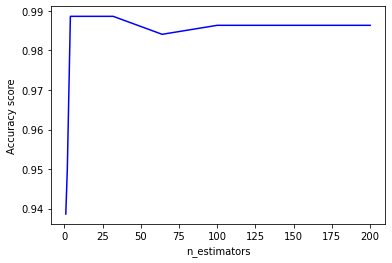

In [43]:
from sklearn.ensemble import RandomForestClassifier
acc_score = []
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
for i in n_estimators:
    RF = RandomForestClassifier(n_estimators=i, random_state=2)
    RF.fit(Xtrain,Ytrain)
    predicted_values = RF.predict(Xtest)

    x = metrics.accuracy_score(Ytest, predicted_values)
    acc_score.append(x) 
    
plt.plot(n_estimators, acc_score, 'b', label='Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.show()                      

In [44]:
acc_score

[0.9386363636363636,
 0.95,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9840909090909091,
 0.9863636363636363,
 0.9863636363636363]

In [45]:
RF = RandomForestClassifier(n_estimators=16, random_state=2)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('RF')                   #model name
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.89      1.00      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [46]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99318182, 0.99090909, 0.99318182, 0.99090909, 0.99318182])

In [47]:
RF_pkl = open('C:/Users/Hp/Documents/crop/RandomForest.pkl', 'wb')
pickle.dump(RF, RF_pkl)
RF_pkl.close()

# K-NEAREST NEIGHBOUR

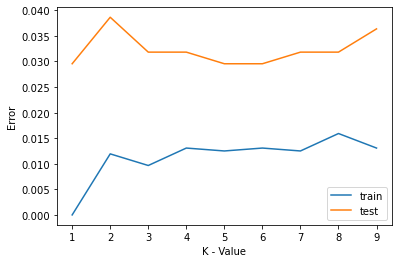

In [48]:
from sklearn.neighbors import KNeighborsClassifier 
error1=[]
error2=[]
for k in range(1,10):
  k_nn = KNeighborsClassifier(n_neighbors=k)
  k_nn.fit(Xtrain,Ytrain)
  y_pred1 = k_nn.predict(Xtrain)
  error1.append(np.mean(Ytrain!=y_pred1))
  y_pred2 = k_nn.predict(Xtest)
  error2.append(np.mean(Ytest!=y_pred2))
plt.plot(range(1,10),error1,label='train')
plt.plot(range(1,10),error2,label='test')
plt.xlabel('K - Value')
plt.ylabel('Error')
plt.legend()

In [49]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
X_test_norm = norm.transform(Xtest)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_norm,Ytrain)
predicted_values = knn.predict(X_test_norm)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('KNN')                   #model name
print("KNN's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

KNN's Accuracy is:  0.9727272727272728
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.89      1.00      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.96      0.92        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       0.90      1.00      0.95        26
   mothbeans       1.00      0.74      0.85        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [50]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99318182, 0.99090909, 0.99318182, 0.99090909, 0.99318182])

In [51]:
KNN_pkl = open('C:/Users/Hp/Documents/crop/KNN.pkl', 'wb')
pickle.dump(knn, KNN_pkl)
KNN_pkl.close()

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

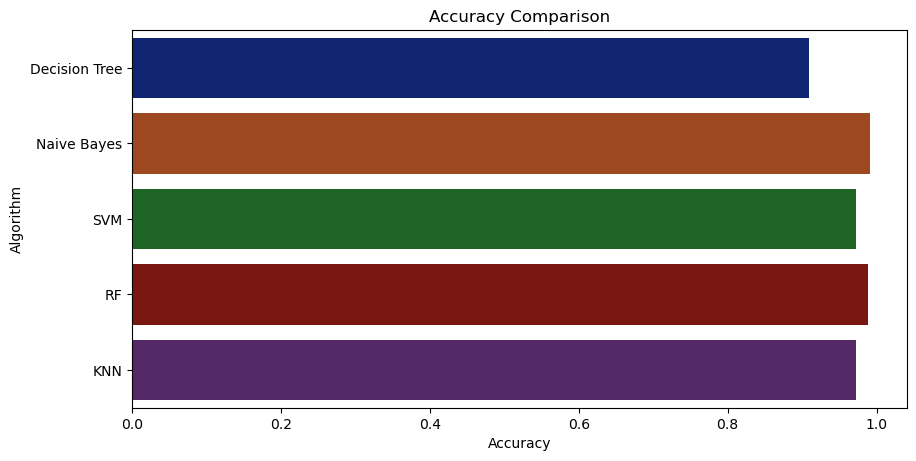

In [52]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [53]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9090909090909091
Naive Bayes --> 0.990909090909091
SVM --> 0.9727272727272728
RF --> 0.9886363636363636
KNN --> 0.9727272727272728


In [64]:
#['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
data = np.array([[45,33,40,20,66,6.5,101]])
prediction = NaiveBayes.predict(data)
print(prediction)

['jute']
